# **`**`Toxic Comment Classification`**`**

In [ ]:
#importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
#Loading the dataset
df=pd.read_csv("Toxic comment.csv")

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Finding the Shape of Dataset
df.shape

(159571, 8)

In [ ]:
#To see info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99999 non-null  object 
 1   comment_text   99999 non-null  object 
 2   toxic          99999 non-null  float64
 3   severe_toxic   99999 non-null  float64
 4   obscene        99999 non-null  float64
 5   threat         99999 non-null  float64
 6   insult         99999 non-null  float64
 7   identity_hate  99999 non-null  float64
dtypes: float64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
#To see null Values
df.isnull().sum()

id               59572
comment_text     59572
toxic            59572
severe_toxic     59572
obscene          59572
threat           59572
insult           59572
identity_hate    59572
dtype: int64

In [ ]:
#To drop Null Values
df1=df.dropna()

In [ ]:
#After droping null Values
df1.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
#Checking shape after dropping null values
df1.shape

(99999, 8)

# **`Data Visualisation`**

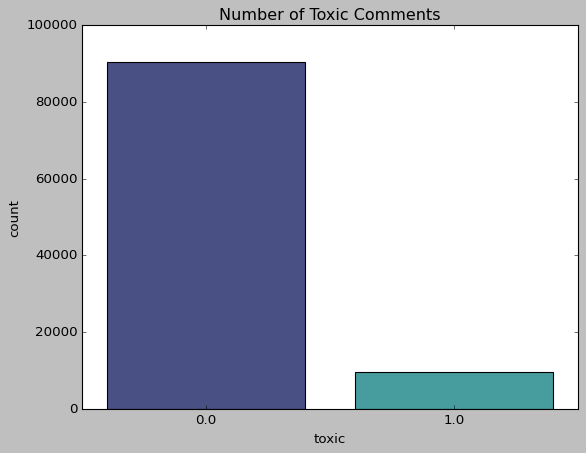

In [ ]:
#Checking the count of Toxic Comments
sns.countplot(x='toxic',data=df1,palette="mako")
plt.title('Number of Toxic Comments')
plt.show()

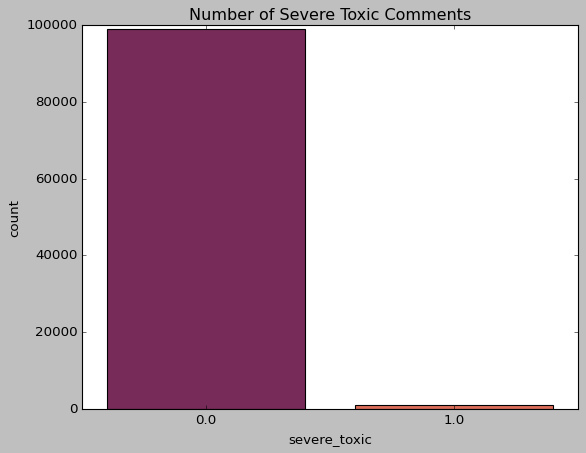

In [ ]:
#Checking the count of Severe Toxic Comments

sns.countplot(x='severe_toxic',data=df1,palette="rocket")
plt.title('Number of Severe Toxic Comments')
plt.show()

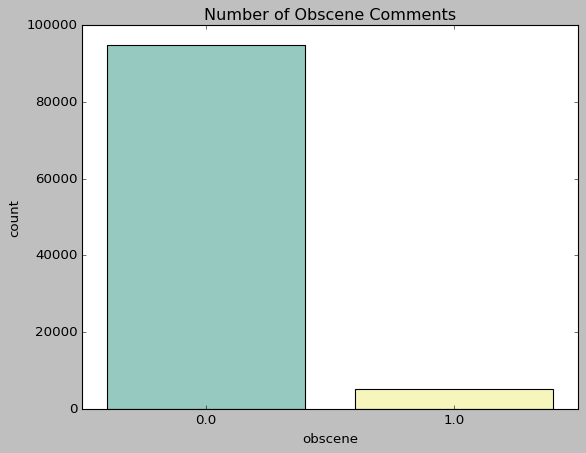

In [ ]:
#Checking the count of Obscene Comments

sns.countplot(x='obscene',data=df1,palette="Set3")
plt.title('Number of Obscene Comments')
plt.show()

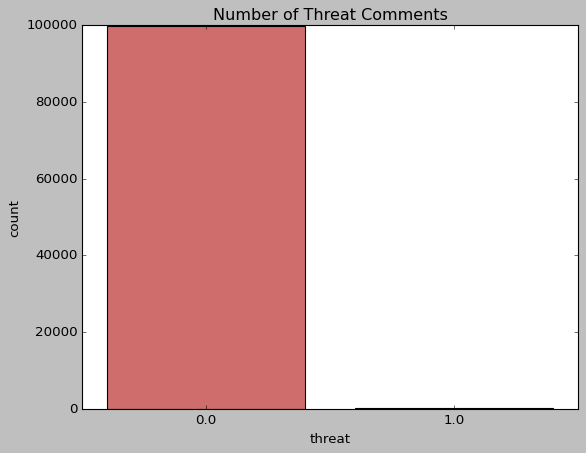

In [ ]:
#Checking the count of Threat Comments
sns.countplot(x='threat',data=df1,palette="flare")
plt.title('Number of Threat Comments')
plt.show()

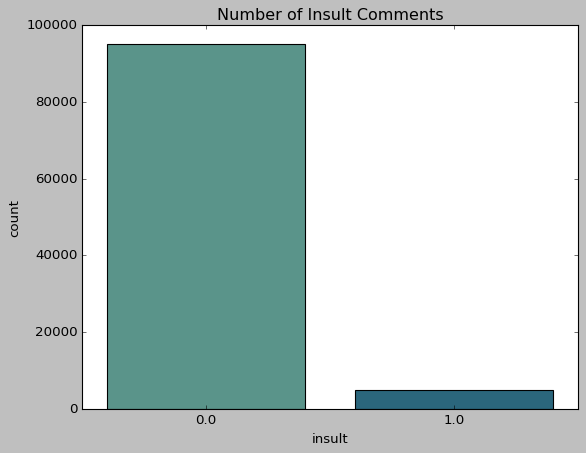

In [ ]:
#Checking the count of Insult Comments
sns.countplot(x='insult',data=df1,palette="crest")
plt.title('Number of Insult Comments')
plt.show()

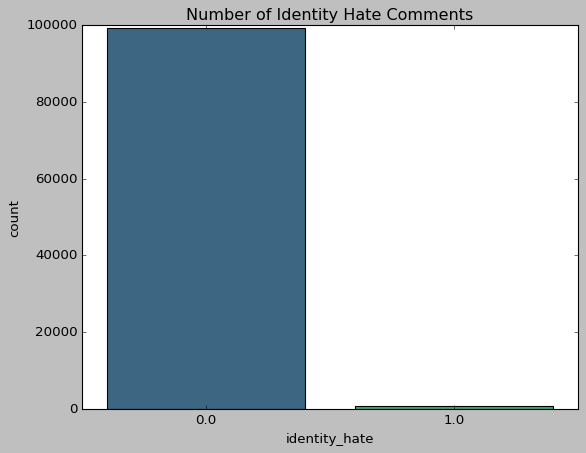

In [ ]:
#Checking the count of Identity Hate Comments
sns.countplot(x='identity_hate',data=df1,palette="viridis")
plt.title('Number of Identity Hate Comments')
plt.show()

Text(0.5, 1.0, 'Comment Type Heatmap')

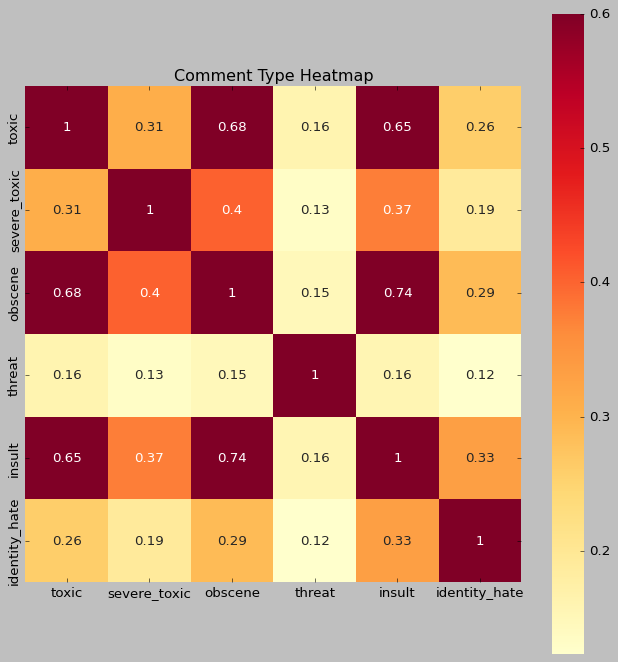

In [ ]:
#Checking the Correlation of Comments
plt.figure('heatmap', figsize=[10,10])
sns.heatmap(df1.corr(), vmax=0.6, square=True, annot=True, cmap='YlOrRd')
plt.title('Comment Type Heatmap')

# **`Text Cleaning`**


# **Removal of special Characters**

In [ ]:

df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#To Clean Data
import re
def clean_text(text):
    # Remove newline characters and extra spaces
    text=re.sub(r'\s+', ' ', text).strip()
    # Remove non-alphanumeric characters except spaces
    text=re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df1['comment_text']=df1['comment_text'].apply(clean_text)

In [ ]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,More I cant make any real suggestions on impr...,0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0.0,0.0,0.0,0.0,0.0,0.0


# **To Convert to Lowercase**

In [ ]:
#To convert to Lowercase
def lowercase_text(text):
    return text.lower()

df1['comment_text']=df1['comment_text'].apply(lowercase_text)

In [ ]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0.0,0.0,0.0,0.0,0.0,0.0


# **Word Tokenize**

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Apply the tokenize_words function to the comment_text column
df1['comment_text'] = df1['comment_text'].apply(word_tokenize)

In [ ]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[explanation, why, the, edits, made, under, my...",0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,"[daww, he, matches, this, background, colour, ...",0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"[hey, man, im, really, not, trying, to, edit, ...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"[more, i, cant, make, any, real, suggestions, ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"[you, sir, are, my, hero, any, chance, you, re...",0.0,0.0,0.0,0.0,0.0,0.0


# **Remove Stopwords**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(tokenized_words):
    return [word for word in tokenized_words if word not in stop_words]

# Apply the remove_stopwords function to the tokenized_words column
df1['comment_text']=df1['comment_text'].apply(remove_stopwords)

In [ ]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[explanation, edits, made, username, hardcore,...",0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,"[daww, matches, background, colour, im, seemin...",0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"[hey, man, im, really, trying, edit, war, guy,...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"[cant, make, real, suggestions, improvement, w...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"[sir, hero, chance, remember, page, thats]",0.0,0.0,0.0,0.0,0.0,0.0


# **`TF-IDF (Term Frequency-Inverse Document Frequency) vectorize`**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [' '.join(comment) for comment in df1['comment_text']]

# Initialize the TfidfVectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)

WordFeatures = word_vectorizer.fit_transform(documents)

# Now, 'WordFeatures' contains the TF-IDF numerical representations of your text data.


# **`LabelEncoder`**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to other specified columns
label_encoder = LabelEncoder()
columns_to_encode = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

for column in columns_to_encode:
    df1[column] = label_encoder.fit_transform(df1[column])

In [ ]:
requiredTarget= df1[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].sum(axis=1).astype(np.int64)


In [ ]:
requiredTarget

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99995    0
99996    0
99997    0
99998    0
Length: 99999, dtype: int64

# **`Splitting the dataset into training and testing sets`**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(79999, 1500)
(20000, 1500)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(79999,)
(20000,)


# **`logistic regression model and perform various evaluation tasks `**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

model=LogisticRegression()
model.fit(X_train,y_train)
model_pred=model.predict(X_test)
accuracy=accuracy_score(model_pred,y_test)
print("Acuuracy :{:.2f}%".format(accuracy*100))

Acuuracy :92.25%


In [ ]:
print(confusion_matrix(y_test,model_pred))
print("\n")
print(classification_report(y_test,model_pred))

[[17993    41     2     8     0     0     0]
 [  617   110    18    36     3     0     0]
 [  199    60    44    93     7     0     0]
 [  127    37    43   271    27     0     0]
 [   42    13    12   103    33     0     0]
 [    6     6     3    23    19     0     0]
 [    3     0     0     1     0     0     0]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18044
           1       0.41      0.14      0.21       784
           2       0.36      0.11      0.17       403
           3       0.51      0.54      0.52       505
           4       0.37      0.16      0.23       203
           5       0.00      0.00      0.00        57
           6       0.00      0.00      0.00         4

    accuracy                           0.92     20000
   macro avg       0.37      0.28      0.30     20000
weighted avg       0.89      0.92      0.90     20000



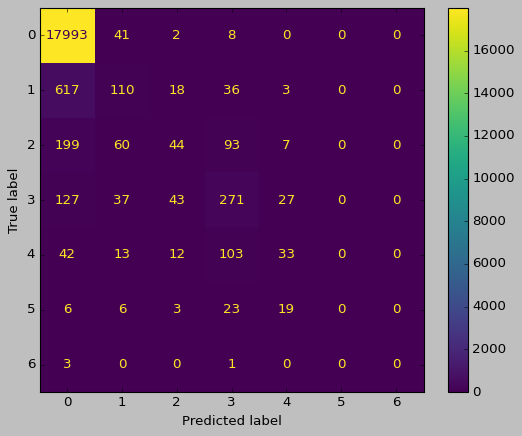

In [ ]:
plt.style.use('classic')
cm=confusion_matrix(y_test,model_pred,labels=model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

# **`Support vector classification`**

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameters :",grid.best_params_)

Best parameters : {'C': 10}


In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print("Test accuracy :{:.2f}%".format(accuracy*100))

Test accuracy :92.14%


In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[17955    64    11    12     2     0     0]
 [  576   120    43    40     5     0     0]
 [  171    60    67    88    17     0     0]
 [   97    46    65   236    60     1     0]
 [   36    13    24    82    48     0     0]
 [    6     5     3    21    21     1     0]
 [    3     0     0     1     0     0     0]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18044
           1       0.39      0.15      0.22       784
           2       0.31      0.17      0.22       403
           3       0.49      0.47      0.48       505
           4       0.31      0.24      0.27       203
           5       0.50      0.02      0.03        57
           6       0.00      0.00      0.00         4

    accuracy                           0.92     20000
   macro avg       0.42      0.29      0.31     20000
weighted avg       0.90      0.92      0.91     20000



In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
SVCmodel=LinearSVC()
SVCmodel.fit(X_train,y_train)

LinearSVC()

In [ ]:
svc_pred=SVCmodel.predict(X_test)
svc_acc=accuracy_score(svc_pred,y_test)
print("Accuracy:{:.2f}%".format(svc_acc*100))

Accuracy:92.17%


In [ ]:
print(confusion_matrix(y_test,svc_pred))
print("\n")
print(classification_report(y_test,svc_pred))

[[18011    18     4    11     0     0     0]
 [  646    68    12    50     8     0     0]
 [  210    29    27   123    13     1     0]
 [  122    32    29   298    23     1     0]
 [   45    11     5   110    31     1     0]
 [    7     6     2    27    15     0     0]
 [    3     0     0     1     0     0     0]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18044
           1       0.41      0.09      0.14       784
           2       0.34      0.07      0.11       403
           3       0.48      0.59      0.53       505
           4       0.34      0.15      0.21       203
           5       0.00      0.00      0.00        57
           6       0.00      0.00      0.00         4

    accuracy                           0.92     20000
   macro avg       0.36      0.27      0.28     20000
weighted avg       0.89      0.92      0.90     20000



In [ ]:
from sklearn.model_selection import GridSearchCV
grid={
    'C':[0.01,0.1,1,10],
    'kernel':["linear","poly","rbf","sigmoide"],
    "degree":[1,3,5,7],
    "gamma":[0.01,1]
}
grid=GridSearchCV(SVCmodel,param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [ ]:
print("Best parameter",grid.best_params_)

Best parameter {'C': 1}


In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print("Test accuracy:{:.2f}%".format(accuracy*100))

Test accuracy:92.17%


In [ ]:
print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[18011    18     4    11     0     0     0]
 [  646    68    12    50     8     0     0]
 [  210    29    27   123    13     1     0]
 [  122    32    29   298    23     1     0]
 [   45    11     5   110    31     1     0]
 [    7     6     2    27    15     0     0]
 [    3     0     0     1     0     0     0]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18044
           1       0.41      0.09      0.14       784
           2       0.34      0.07      0.11       403
           3       0.48      0.59      0.53       505
           4       0.34      0.15      0.21       203
           5       0.00      0.00      0.00        57
           6       0.00      0.00      0.00         4

    accuracy                           0.92     20000
   macro avg       0.36      0.27      0.28     20000
weighted avg       0.89      0.92      0.90     20000



# **`RandomForestClassifier`**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)
print("Accuracy:{:.2f}%".format(svc_acc*100))

Accuracy:92.17%


In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     18044
           1       0.37      0.07      0.11       784
           2       0.34      0.13      0.18       403
           3       0.45      0.59      0.51       505
           4       0.28      0.15      0.20       203
           5       0.20      0.02      0.03        57
           6       0.00      0.00      0.00         4

    accuracy                           0.92     20000
   macro avg       0.37      0.28      0.29     20000
weighted avg       0.89      0.92      0.90     20000



# `Multinomial Naive Bayes`

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming you have already trained and tested your Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_pred = naive_bayes_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, naive_bayes_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 91.70%


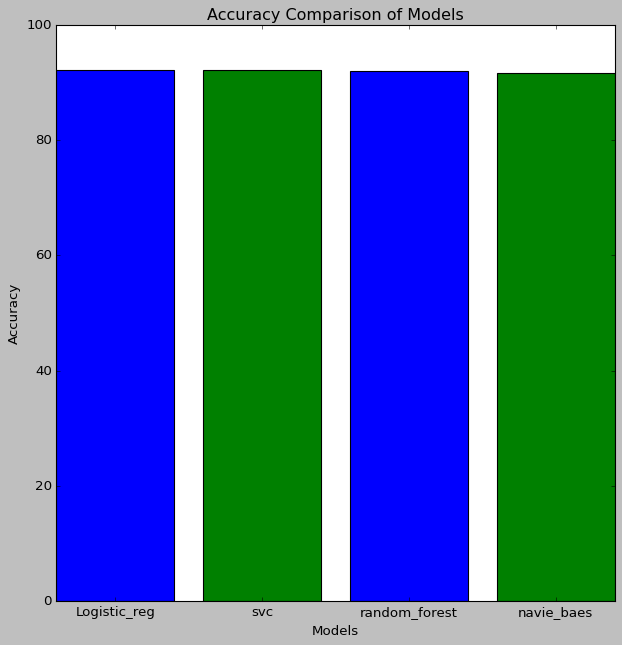

In [ ]:
import matplotlib.pyplot as plt

model_names = ['Logistic_reg', 'svc','random_forest','navie_baes']
accuracy_values = [92.25,92.17,92.04,91.70]

plt.figure(figsize=(9, 9))
plt.bar(model_names, accuracy_values, color=['blue', 'green','yellow','red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')

plt.show()

# **`Long Short-Term Memory (LSTM) `**

In [ ]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
df2=df.dropna()+

In [ ]:
df2.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [ ]:
df2

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99994,172ccd804a637700,Videos \n\nI don't think these videos are a go...,0.0,0.0,0.0,0.0,0.0,0.0
99995,172e07f9ab48bb39,"My reference is a book, The Kemantney Language...",0.0,0.0,0.0,0.0,0.0,0.0
99996,172e16e4f8de66fe,"""::: because there is 8 lines of text in the t...",0.0,0.0,0.0,0.0,0.0,0.0
99997,1730ef89d087b7c8,"""\n\nIt says """"in"""" the country, not """"of"""" th...",0.0,0.0,0.0,0.0,0.0,0.0


# **`Convert text into Lowercase`**


In [ ]:
df2["comment_text"]=df2["comment_text"].str.lower()

In [ ]:
df2["comment_text"].head()

0    explanation\nwhy the edits made under my usern...
1    d'aww! he matches this background colour i'm s...
2    hey man, i'm really not trying to edit war. it...
3    "\nmore\ni can't make any real suggestions on ...
4    you, sir, are my hero. any chance you remember...
Name: comment_text, dtype: object

# **`To Clean Data`**

In [ ]:
import re
def clean_text(text):
    # Remove newline characters and extra spaces
    text=re.sub(r'\s+', ' ', text).strip()
    # Remove non-alphanumeric characters except spaces
    text=re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df2['comment_text']=df2['comment_text'].apply(clean_text)

# **`Word Tokenize`**

In [ ]:
from nltk.tokenize import word_tokenize

# Assuming you have a DataFrame 'df' with a 'comment_text' column
# First, make sure all values in the 'comment_text' column are strings
df2['comment_text'] = df2['comment_text'].astype(str)

# Tokenize the 'comment_text' column
comment_text = df2["comment_text"].apply(word_tokenize)

# Print the tokenized data
comment_text.head()


0    [explanation, why, the, edits, made, under, my...
1    [daww, he, matches, this, background, colour, ...
2    [hey, man, im, really, not, trying, to, edit, ...
3    [more, i, cant, make, any, real, suggestions, ...
4    [you, sir, are, my, hero, any, chance, you, re...
Name: comment_text, dtype: object

# **`Stopwords`**

In [ ]:
from nltk.corpus import stopwords
stopwords=nltk.corpus.stopwords.words('english')

In [ ]:
df2["comment_text"]=comment_text.apply(lambda x:" ".join([w for w in x if w not in stopwords]))
df2["comment_text"].head()

0    explanation edits made username hardcore metal...
1    daww matches background colour im seemingly st...
2    hey man im really trying edit war guy constant...
3    cant make real suggestions improvement wondere...
4                  sir hero chance remember page thats
Name: comment_text, dtype: object

# **`Stemming`**

In [ ]:
#Stemming
ps=PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])


In [ ]:
df2['comment_text']=df2['comment_text'].apply(stem_words)
df2['comment_text'].head(10)

0    explan edit made usernam hardcor metallica fan...
1    daww match background colour im seemingli stuc...
2    hey man im realli tri edit war guy constantli ...
3    cant make real suggest improv wonder section s...
4                      sir hero chanc rememb page that
5                    congratul well use tool well talk
6                            cocksuck piss around work
7    vandal matt shirvington articl revert pleas do...
8    sorri word nonsens offens anyway im intend wri...
9                     align subject contrari dulithgow
Name: comment_text, dtype: object

# **`polarity`**

In [ ]:
from textblob import TextBlob
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df2['polarity']=df2['comment_text'].apply(polarity)

In [ ]:
df2.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,polarity
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0.0,0.0,0.0,0.0,0.0,0.0,0.136364
1,000103f0d9cfb60f,daww match background colour im seemingli stuc...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,000113f07ec002fd,hey man im realli tri edit war guy constantli ...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0.0,0.0,0.0,0.0,0.0,0.0,0.140000
4,0001d958c54c6e35,sir hero chanc rememb page that,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
texts = df2['comment_text'].tolist()
labels = df2['polarity'].tolist()

# **`Tokenize text and create word index`**


In [ ]:
num_words=10000
tokenizer=Tokenizer(num_words=num_words,oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences=tokenizer.texts_to_sequences(texts)

In [ ]:
# Pad sequences to the same length
max_sequence_length=200
padded_sequences=pad_sequences(sequences, maxlen=max_sequence_length, padding='post', truncating='post')

In [ ]:
# Convert labels to numpy array
labels=np.array(labels)

# **`Split dataset into training and testing sets`**


In [ ]:
X_train,X_test,y_train,y_tes=train_test_split(texts,labels,test_size=0.2,random_state=42)

# **`Build the LSTM model`**


In [ ]:
model=Sequential()
model.add(Embedding(input_dim=num_words,output_dim=128,input_length=max_sequence_length))
model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# **`Train the model`**


In [ ]:
batch_size=64
epochs=2
model.fit(padded_sequences,labels,batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/2
1407/1407 [==============================] - 1145s 812ms/step - loss: 0.1839 - accuracy: 0.3733 - val_loss: 0.1956 - val_accuracy: 0.3718
Epoch 2/2
1407/1407 [==============================] - 1144s 813ms/step - loss: 0.1809 - accuracy: 0.3736 - val_loss: 0.1944 - val_accuracy: 0.3718


# **`Evaluate the model on test data`**


In [ ]:
loss, accuracy=model.evaluate(padded_sequences,labels,verbose=0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

Test loss: 0.1823
Test accuracy: 0.3735
